In [21]:
import json
import os
from pathlib import Path

import xmltodict
import numpy as np
import pandas as pd


### Setup

In [3]:
os.chdir('..')
os.getcwd()

'c:\\Users\\delgr\\Projects\\advancedPython\\Day6a'

### Set Script Parameters

In [4]:
session_dir = 'data/raw/20161214_cori_steinmetz'

In [5]:
session_path = Path(session_dir)
assert session_path.exists()

### Extract Data

In [6]:
chunk_files = list(session_path.glob('eye_tracking/CHUNK*.xml'))
chunk_files

[WindowsPath('data/raw/20161214_cori_steinmetz/eye_tracking/CHUNK00001.xml'),
 WindowsPath('data/raw/20161214_cori_steinmetz/eye_tracking/CHUNK00002.xml'),
 WindowsPath('data/raw/20161214_cori_steinmetz/eye_tracking/CHUNK00003.xml'),
 WindowsPath('data/raw/20161214_cori_steinmetz/eye_tracking/CHUNK00004.xml'),
 WindowsPath('data/raw/20161214_cori_steinmetz/eye_tracking/CHUNK00005.xml'),
 WindowsPath('data/raw/20161214_cori_steinmetz/eye_tracking/CHUNK00006.xml'),
 WindowsPath('data/raw/20161214_cori_steinmetz/eye_tracking/CHUNK00007.xml')]

In [7]:
time, pupil_x, pupil_y, pupil_area = [], [], [], []
for file in sorted(chunk_files):
    data = xmltodict.parse(file.read_bytes())['root']
    for frame in data.values():
        time.append(int(frame['time']['#text']))
        pupil_x.append(float(frame['pupilx']['#text']))
        pupil_y.append(float(frame['pupily']['#text']))
        pupil_area.append(float(frame['pupil_area']['#text']))


df = pd.DataFrame({'time': time, 'pupil_x': pupil_x, 'pupil_y': pupil_y, 'pupil_area': pupil_area})
df = df.astype({'time': np.uint32})
df

,time,pupil_x,pupil_y,pupil_area
0,0,0.812856,0.664247,0.165841
1,10,0.778162,0.612752,0.158668
2,20,0.812352,0.632769,0.169667
3,30,0.760796,0.779100,0.172513
4,40,0.790401,0.680980,0.176774
...,...,...,...,...
90995,909950,-0.446190,0.230169,0.117658
90996,909960,-0.472352,0.359197,0.120560
90997,909970,-0.453607,0.130451,0.113835
90998,909980,-0.486026,0.239184,0.109935


In [12]:
extracted_path = Path(f'data/extracted/{session_path.name}/eye_tracking')
extracted_path.mkdir(parents=True, exist_ok=True)

In [13]:
np.save(extracted_path / 'recording.npy', df.to_records(index=False))

In [23]:
mdata = {}
mdata['pupil_x'] = {
    'units': frame['pupilx']['@units'],
    'description': frame['pupilx']['@name']
}
mdata['pupil_y'] = {
    'units': frame['pupily']['@units'],
    'description': frame['pupily']['@name']
}
mdata['pupil_area'] = {
    'units': frame['pupil_area']['@units'],
    'description': frame['pupil_area']['@name']
}
frame
mdata
(extracted_path/'recording.json').write_text(json.dumps(mdata, indent=3))
mdata

{'pupil_x': {'units': 'px', 'description': 'Pupil X Position'},
 'pupil_y': {'units': 'px', 'description': 'Pupil Y Position'},
 'pupil_area': {'units': 'px^2', 'description': 'Pupil Area'}}

### Quality Check

<Axes: xlabel='time'>

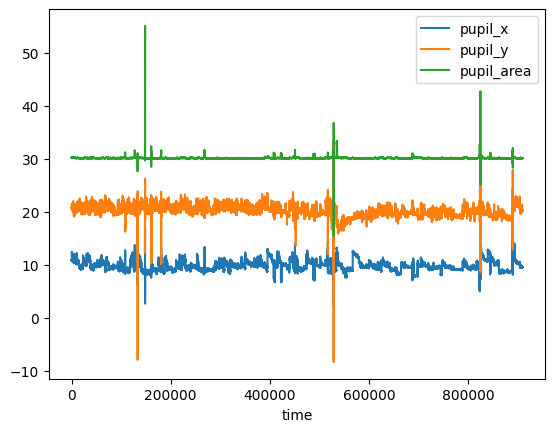

In [18]:
(df.set_index('time') + [10, 20, 30]).plot()